In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random
from scipy.optimize import curve_fit

import h5py
from IPython.utils import io

In [2]:
%matplotlib widget

In [3]:
import sys
sys.path.append('../../../nadavp/new_trap/Tools/')
sys.path.append('../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [4]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
from likelihood_calculator import auxiliary_functions as aux

sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities import *

In [5]:
bdf_discharge = load_dir(dirname='/data/new_trap/20200730/Bead2/Discharge/',max_file=100)

89  files in folder
89  files loaded


In [6]:
gfw = GravityFramework.GravityFramework()
m1 = gfw.build_z_response(bdf_discharge, drive_freq=71, charges=10, bandwidth=1, decimate=10, bimodal=False)

***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  246458593.1819089
***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  185840160.50690785
***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  151541297.52397105
***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  127098893.2578729
***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  108738665.27352697
***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  70056568.66589151
***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  79502488.92800286
***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  70078315.48128577
***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  66025844.001170814
***************

***************************************************
Z2-amplitude:  1.42e+02
reduced chi2:  3181.8986968698505
***************************************************
Z2-amplitude:  1.24e+02
reduced chi2:  3691.3834773341505
***************************************************
Z2-amplitude:  1.97e+02
reduced chi2:  8590.128425890605
***************************************************
Z2-amplitude:  2.27e+02
reduced chi2:  5173.218669228525
***************************************************
Z2-amplitude:  2.37e+02
reduced chi2:  3951.323166124945
***************************************************
Z2-amplitude:  2.69e+02
reduced chi2:  4670.398109903083
***************************************************
Z2-amplitude:  2.77e+02
reduced chi2:  7959.296085659526
***************************************************
Z2-amplitude:  4.31e+02
reduced chi2:  269620.886375561
***************************************************
Z2-amplitude:  2.97e+02
reduced chi2:  12724.520950441662
*****************

In [7]:
m2 = gfw.build_x_response(bdf_discharge, drive_freq=71, charges=10, bandwidth=1, decimate=10)

***************************************************
X2-amplitude:  1.30e+01
reduced chi2:  0.6042476117451665
***************************************************
X2-amplitude:  2.66e+01
reduced chi2:  0.9387201325451274
***************************************************
X2-amplitude:  2.47e+01
reduced chi2:  2.3331685833595723
***************************************************
X2-amplitude:  2.40e+01
reduced chi2:  0.5597063926302616
***************************************************
X2-amplitude:  2.31e+01
reduced chi2:  0.5701121635969646
***************************************************
X2-amplitude:  1.46e+01
reduced chi2:  0.3917674932838361
***************************************************
X2-amplitude:  1.21e+00
reduced chi2:  0.34587757226830484
***************************************************
X2-amplitude:  5.16e+00
reduced chi2:  0.39840936728900544
***************************************************
X2-amplitude:  4.95e+00
reduced chi2:  1.1002786570490792
********

***************************************************
X2-amplitude:  9.96e+00
reduced chi2:  0.20200799815074838
***************************************************
X2-amplitude:  9.63e+00
reduced chi2:  0.2400257731662762
***************************************************
X2-amplitude:  9.48e+00
reduced chi2:  0.20400984698786184
***************************************************
X2-amplitude:  9.88e+00
reduced chi2:  0.22084668619396433
***************************************************
X2-amplitude:  9.48e+00
reduced chi2:  0.31173676974694997
***************************************************
X2-amplitude:  9.37e+00
reduced chi2:  0.15930767055499384
***************************************************
X2-amplitude:  9.38e+00
reduced chi2:  0.18018628310571788
***************************************************
X2-amplitude:  9.36e+00
reduced chi2:  0.27496301655437017
***************************************************
X2-amplitude:  9.50e+00
reduced chi2:  0.12696727629054372
**

In [18]:
phases = [m_.values[2] for m_ in m1]
amps = [m_.values[0] for m_ in m1]
amps2 = [m_.values[0] for m_ in m2]

In [20]:
_,ax = plt.subplots(figsize=(10.5,4))
ax.scatter(range(len(phases)), phases)
ax.set(xlabel='dataset', ylabel='phase')
print(np.mean(phases[30:100]))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

-0.5802541041707824


In [14]:
fname = r'/data/new_trap/20200730/Bead2/TransFunc/TransFunc_4_X_z-7e5_250s_1Hz.h5'
tf_x = BeadDataFile.BeadDataFile(fname)
fname = r'/data/new_trap/20200730/Bead2/TransFunc/TransFunc_4_Y_z-7e5_250s_1Hz.h5'
tf_y = BeadDataFile.BeadDataFile(fname)
fname = r'/data/new_trap/20200730/Bead2/TransFunc/TransFunc_4_Z_z-7e5_250s_1Hz.h5'
tf_z = BeadDataFile.BeadDataFile(fname)

gfw = GravityFramework.GravityFramework()
gfw.build_transfer_function([tf_x, tf_y, tf_z], base_freq=7, number_of_harmonics=50, scale_freq=71, plot=True)

No height data
No cantilever data
Error loading spinning data
No laser power data
No height data
No cantilever data
Error loading spinning data
No laser power data
No height data
No cantilever data
Error loading spinning data
No laser power data


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [15]:
_,ax = plt.subplots(figsize=(9.5,4))
scale = 45.85
extra_scale = 10.3
extra_scale2 = 100.3

ax.scatter(range(len(amps)), np.array(amps)/scale/extra_scale, label='Discharge')
# ax.scatter(range(len(amps2)), np.array(amps2)/scale/extra_scale2*1000, label='Discharge3 - bimodal')

ax.legend()
ax.set(xlabel='dataset', ylabel='Charges', ylim=(None,None), xlim=(None,None))
ax.grid(axis='y')
ax.legend()
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [26]:
from multiprocessing import Pool
drive_freq = 71
fit_kwargs = {'A': 0, 'f': drive_freq, 'phi': 0, 'A2': 0.13, 'f2': drive_freq,
              'delta_phi': 0.0,
              'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
              'error_A2': 1, 'error_f2': 1, 'error_delta_phi': 0.1,
              'limit_phi': [-2 * np.pi, 2 * np.pi], 'limit_delta_phi': [-2 * np.pi, 2 * np.pi],
              'limit_A': [-1000, 1000], 'limit_A2': [0, 1000],
              'print_level': 0, 'fix_f': True, 'fix_phi': False, 'fix_f2': True, 'fix_delta_phi': False,
              'fix_A2': False}
bandwidth=1
decimate = 10
ll = likelihood_analyser.LikelihoodAnalyser()

In [18]:
def func1_scale(i):
# for i,bdf_ in enumerate(data_bdfs2):
    print(i,'  ******************')
    fname = r'/data/new_trap/20200730/Bead2/Discharge/Response/Discharge_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)
    drive_freq = int(bb.cant_freq)
    fit_kwargs = {'A': 0, 'f': drive_freq, 'phi': -0.056, 'A2': 0.13, 'f2': drive_freq,
                  'delta_phi': 0.07,
                  'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
                  'error_A2': 1, 'error_f2': 1, 'error_delta_phi': 0.1,
                  'limit_phi': [-2 * np.pi, 2 * np.pi], 'limit_delta_phi': [-2 * np.pi, 2 * np.pi],
                  'limit_A': [-1000, 1000], 'limit_A2': [0, 1000],
                  'print_level': 0, 'fix_f': True, 'fix_phi': True, 'fix_f2': True, 'fix_delta_phi': True,
                  'fix_A2': True}

    frequency = fit_kwargs['f']

    xx2 = bb.response_at_freq2('x', frequency, bandwidth=bandwidth) * 50000
    xx2 = xx2[5000:-5000:decimate]  # cut out the first and last second

    xx3 = bb.response_at_freq3('x', frequency, bandwidth=bandwidth) / 6
    xx3 = xx3[5000:-5000:decimate]  # cut out the first and last second

    m1_tmp = ll.find_mle_2sin(xx2, xx3, fsamp=5000 / decimate,
                                     noise_rms=1,
                                     noise_rms2=1,
                                     plot=False, suppress_print=True, **fit_kwargs)


    return m1_tmp.values[0]

if __name__ == '__main__':
    pool = Pool(processes=40)                         # Create a multiprocessing Pool
    mm_mle_scale = np.array(pool.map(func1_scale, range(100,200)))
    pool.close()

103109104102110105  107101100106111118112115108117 116113114 124119 125123120121126129122128130127 131  ******************133  ******************134135136132137 139 138            ******************  ******************   ******************            ******************   

 

In [19]:
scaleX = np.mean(mm_mle_scale/3)*-1
scaleX10 = np.mean(mm_mle_scale/3)*-1
print(scaleX/3), print(scaleX10/3)

In [20]:
bandwidth = 1

In [21]:
print(bandwidth)

In [9]:
def func1(i):
# for i,bdf_ in enumerate(data_bdfs2):
    print(i,'  ******************')
    fname = r'/data/new_trap/20200730/Bead2/Neutrality/71Hz200VNoSpin/Discharge_'+str(i)+'.h5'
#     fname = r'/data/new_trap/20200720/Bead1/Millicharge/200V71Hz50kHzSpin/Discharge_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)
    drive_freq = int(bb.cant_freq)
#     freqs.append(drive_freq)
    fit_kwargs = {'A': 0, 'f': drive_freq, 'phi': -0.056, 'A2': 0.13, 'f2': drive_freq,
                  'delta_phi': 0.07,
                  'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
                  'error_A2': 1, 'error_f2': 1, 'error_delta_phi': 0.1,
                  'limit_phi': [-2 * np.pi, 2 * np.pi], 'limit_delta_phi': [-2 * np.pi, 2 * np.pi],
                  'limit_A': [-1000, 1000], 'limit_A2': [0, 1000],
                  'print_level': 0, 'fix_f': True, 'fix_phi': True, 'fix_f2': True, 'fix_delta_phi': True,
                  'fix_A2': True}

    frequency = fit_kwargs['f']
    
    xx2 = bb.response_at_freq2('x', frequency, bandwidth=bandwidth) * 50000
    xx2 = xx2[5000:-5000:decimate]  # cut out the first and last second

    xx3 = bb.response_at_freq3('x', frequency, bandwidth=bandwidth) / 6
    xx3 = xx3[5000:-5000:decimate]  # cut out the first and last second

    m1_tmp = ll.find_mle_2sin(xx2, xx3, fsamp=5000 / decimate,
                                     noise_rms=1,
                                     noise_rms2=1,
                                     plot=False, suppress_print=True, **fit_kwargs)


    return m1_tmp.values[0]

if __name__ == '__main__':
    pool = Pool(processes=40)                         # Create a multiprocessing Pool
    mm_71Hz200VNoSpin = np.array(pool.map(func1, range(500)))
    pool.close()

8012204243216   9284724010896 3628 1008880104 11676 11268124120128  ******************136 152132156148140 144  ******************   ******************     ******************     ******************     ******************   
   ******************       ******************       ******************
 
  ******************  ******************  ******************  ******************  ******************  ******************  ******************  ******************  ******************  ******************  ******************  ******************
  ******************


  ******************  ******************5248  ******************
  ******************56  ******************  ******************
  ******************  ******************  ******************  ******************  ******************
  ******************













 
 


 





  ******************  ******************  ******************


446064    ******************   ******************
  ******************

65   ******************
113 

### 71Hz, different spin

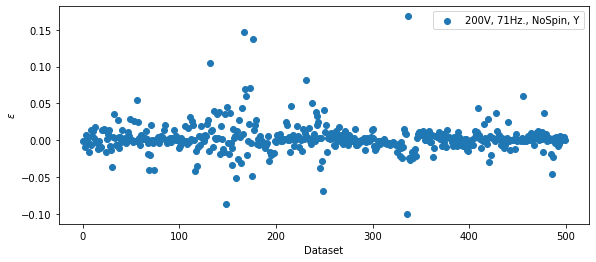

In [10]:
_, ax= plt.subplots(figsize=(9.5,4))
# ax.scatter(range(500), mm_200V71Hz11kHzSpin/20/scaleX, label='200V, 71Hz., 11kHzSpin')
# ax.scatter(range(500), mm_200V71Hz14kHzSpin/20/scaleX, label='200V, 71Hz., 14kHzSpin')
# ax.scatter(range(500), mm_200V71Hz24kHzSpin/20/scaleX, label='200V, 71Hz., 24kHzSpin')
# ax.scatter(range(500), mm_200V71Hz32kHzSpin/20/scaleX, label='200V, 71Hz., 32kHzSpin')
# ax.scatter(range(500), mm_200V71Hz40kHzSpin/20/scaleX, label='200V, 71Hz., 40kHzSpin')
# ax.scatter(range(500), mm_200V71Hz50kHzSpin/20/scaleX, label='200V, 71Hz., 50kHzSpin')
# ax.scatter(range(2000), mm_50V71Hz50kHzSpin[2000:]/5/scaleX, label='200V, 71Hz., 50V 50kHzSpin')
# ax.scatter(range(3500), mm_Random200V50kHzSpin/5/scaleX, label='200V, Random., 50kHzSpin')
# ax.scatter(range(2000), mm_71Hz200VNoSpin/20/scaleX, label='200V, 71Hz., NoSpin')
# ax.scatter(range(5500), mm_71Hz50VNoSpin/5/scaleX, label='50V, 71Hz., NoSpin')
# ax.scatter(range(500), mm_71Hz20VNoSpin/2/scaleX, label='20V, 71Hz., NoSpin')
# ax.scatter(range(500), mm_71Hz50VNoSpin_1sec/5/scaleX10/np.sqrt(10), label='50V, 71Hz., NoSpin, 1 sec. (notmalized)')
# ax.scatter(range(500), mm_Random50VNoSpin/5/scaleX, label='50V, Random, NoSpin')
# ax.scatter(range(len(mm_71Hz50VNoSpin2)), mm_71Hz50VNoSpin2/5/scaleX, label='50V, 71Hz., NoSpin, second')
# # ax.scatter(range(len(mm_71Hz50VNoSpin2)), mm_71Hz50VNoSpin2_out/5/scaleX, label='50V, 71Hz., NoSpin, second')

# ax.scatter(range(len(mm_71Hz50VNoSpin_Y)), mm_71Hz50VNoSpin_Y/5/scaleX, label='50V, 71Hz., NoSpin, Y')
# ax.scatter(range(len(mm_71Hz20VNoSpin_Y)), mm_71Hz20VNoSpin_Y/2/scaleX, label='20V, 71Hz., NoSpin, Y')
ax.scatter(range(len(mm_71Hz200VNoSpin)), mm_71Hz200VNoSpin/20/scaleX, label='200V, 71Hz., NoSpin, Y')
ax.set(xlabel='Dataset', ylabel=r'$\epsilon$')
ax.legend()

In [ ]:
data = mm_71Hz200VNoSpin
# data = list(mm_71Hz200VNoSpin)+list(mm_71Hz50VNoSpin)
tmpp = [mmm for mmm in np.array(data)/20/scaleX if (mmm<0.4)&(mmm>-0.4)]
print(np.mean(tmpp), np.std(tmpp)/np.sqrt(len(tmpp)))

In [ ]:
data = mm_71Hz50VNoSpin
tmpp = [mmm for mmm in np.array(data)/5/scaleX if (mmm<0.01)&(mmm>-0.01)]

data = mm_71Hz50VNoSpin2
tmpp23 = [mmm/5/scaleX for mmm,mm_out in zip(np.array(data), mm_71Hz50VNoSpin2_out) if (mmm<0.4)&(mmm>-0.4)&(mm_out>-0.4)&(mm_out>-0.4)]

In [ ]:
print(np.mean(tmpp23), np.std(tmpp23)/np.sqrt(len(tmpp23))), print(np.mean(mm_71Hz50VNoSpin2/5/scaleX ), np.std(mm_71Hz50VNoSpin2)/5/scaleX/np.sqrt(len(mm_71Hz50VNoSpin2)))

In [ ]:
mm_71Hz50VNoSpin2_out = mm_71Hz50VNoSpin2

In [ ]:
_,ax = plt.subplots()
ax.scatter(mm_71Hz50VNoSpin2, mm_71Hz50VNoSpin2_out)
ax.set(xlabel='in-band', ylabel='side-band')

In [ ]:
means = [np.mean(tmpp[j*100:(j+1)*100]) for j in range(54)]
stds = [np.std(tmpp[j*100:(j+1)*100]) for j in range(54)]

means2 = [np.mean(tmpp2[j*100:(j+1)*100]) for j in range(49)]
stds2 = [np.std(tmpp2[j*100:(j+1)*100]) for j in range(49)]

means3 = [np.mean(mm_71Hz50VNoSpin_Y[j*100:(j+1)*100]/5/scaleX) for j in range(40)]
stds3 = [np.std(mm_71Hz50VNoSpin_Y[j*100:(j+1)*100]/5/scaleX) for j in range(40)]

In [ ]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.errorbar(np.arange(0,5400,100), means, yerr=stds/np.sqrt(100),fmt='o')
ax.errorbar(np.arange(0,4900,100), means2, yerr=stds2/np.sqrt(100),fmt='o')
ax.errorbar(np.arange(0,4000,100), means3, yerr=stds3/np.sqrt(100),fmt='o')
ax.plot(np.arange(0,5400,100), np.arange(0,5400,100)*0, 'r--')
ax.set(xlabel='dataset', ylabel=r'$\epsilon$')

In [ ]:
_,ax = plt.subplots()
_ = ax.hist(mm_71Hz50VNoSpin/5/scaleX, bins=30, range=(-0.01,0.01))

In [ ]:
means = [np.mean(mm_200V71Hz11kHzSpin/20/scaleX), np.mean(mm_200V71Hz14kHzSpin/20/scaleX), 
         np.mean(mm_200V71Hz24kHzSpin/20/scaleX), np.mean(mm_200V71Hz32kHzSpin/20/scaleX), 
         np.mean(mm_200V71Hz40kHzSpin/20/scaleX), np.mean(mm_200V71Hz50kHzSpin/20/scaleX)]
stds = [np.std(mm_200V71Hz11kHzSpin/20/scaleX)/np.sqrt(500), np.std(mm_200V71Hz14kHzSpin/20/scaleX)/np.sqrt(500)
        ,np.std(mm_200V71Hz24kHzSpin/20/scaleX)/np.sqrt(500), np.std(mm_200V71Hz32kHzSpin/20/scaleX)/np.sqrt(500)
       ,np.std(mm_200V71Hz40kHzSpin/20/scaleX)/np.sqrt(500),np.std(mm_200V71Hz50kHzSpin/20/scaleX)/np.sqrt(500)]
spin_freqs = [11, 14, 24, 32, 40, 50]

means2 = [np.mean(mm_50V71Hz50kHzSpin[2000:]/5/scaleX)]
stds2 = [np.std(mm_50V71Hz50kHzSpin[2000:]/5/scaleX)/np.sqrt(2000)]
spin_freqs2 = [50]

means22 = [np.mean(mm_200V71Hz32kHzSpin_stern/20/5.08), np.mean(mm_200V71Hz40kHzSpin_stern/20/5.08), np.mean(mm_200V71Hz50kHzSpin_stern/20/5.08)]
stds22 = [np.std(mm_200V71Hz32kHzSpin_stern/20/5.08)/np.sqrt(500),np.std(mm_200V71Hz32kHzSpin_stern/20/5.08)/np.sqrt(500),np.std(mm_200V71Hz32kHzSpin_stern/20/5.08)/np.sqrt(500)]
spin_freqs22 = [32, 40, 50]

spin_freqs = [11, 14, 24, 32, 40, 50]

means3 = [np.mean(mm_Random200V50kHzSpin/20/scaleX)]
stds3 = [np.std(mm_Random200V50kHzSpin/20/scaleX)/np.sqrt(3500)]
spin_freqs3 = [50]


means4 = [np.mean(mm_71Hz200VNoSpin/20/scaleX)]
stds4 = [np.std(mm_71Hz200VNoSpin/20/scaleX)/np.sqrt(2000)]
spin_freqs4 = [27]

means5 = [np.mean(mm_71Hz50VNoSpin/5/scaleX), np.mean(mm_71Hz50VNoSpin2/5/scaleX)]
stds5 = [np.std(mm_71Hz50VNoSpin/5/scaleX)/np.sqrt(5500), np.std(mm_71Hz50VNoSpin2/5/scaleX)/np.sqrt(5000)]
spin_freqs5 = [1, 4]

means6 = [np.mean(mm_71Hz50VNoSpin/2/scaleX)]
stds6 = [np.std(mm_71Hz50VNoSpin/2/scaleX)/np.sqrt(500)]
spin_freqs6 = [2]

means7 = [np.mean(mm_71Hz50VNoSpin_1sec/5/scaleX10)]
stds7 = [np.std(mm_71Hz50VNoSpin_1sec/5/scaleX10)/np.sqrt(500)]
spin_freqs7 = [3]

means8 = [np.mean(mm_Random50VNoSpin/5/scaleX10)]
stds8 = [np.std(mm_Random50VNoSpin/5/scaleX10)/np.sqrt(500)]
spin_freqs8 = [4]

means9 = [np.mean(mm_71Hz50VNoSpin_Y[:4000]/5/scaleX)]
stds9 = [np.std(mm_71Hz50VNoSpin_Y[:4000]/5/scaleX)/np.sqrt(4000)]
spin_freqs9 = [5]

means10 = [np.mean(mm_71Hz200VNoSpin_Y/20/scaleX)]
stds10 = [np.std(mm_71Hz200VNoSpin_Y/20/scaleX)/np.sqrt(500)]
spin_freqs10 = [6]

means11 = [np.mean(mm_71Hz20VNoSpin_Y/2/scaleX)]
stds11 = [np.std(mm_71Hz20VNoSpin_Y/2/scaleX)/np.sqrt(500)]
spin_freqs11 = [7]

_,ax = plt.subplots(1,2,figsize=(9.5,4), sharey=True)
ax[0].errorbar(spin_freqs, means, yerr=stds, fmt='o', label='71Hz, 200V')
ax[0].errorbar(spin_freqs22, means22, yerr=stds22, fmt='o', label='71Hz, 200V - stern')
ax[0].errorbar(spin_freqs3, means3, yerr=stds3, fmt='o', label='random, 200V')
# ax[0].errorbar(spin_freqs4, means4, yerr=stds4, fmt='o', label='71Hz, no spin')
ax[0].plot(np.arange(5,55),np.arange(5,55)*0, 'r--')

ax[1].errorbar(spin_freqs5, means5, yerr=stds5, fmt='o', label='71Hz, 50V')
ax[1].errorbar(spin_freqs6, means6, yerr=stds6, fmt='o', label='71Hz, 20V')
ax[1].errorbar(spin_freqs7, means7/np.sqrt(10), yerr=stds7/np.sqrt(10), fmt='o', label='71Hz, 50V, 1 sec.')
# ax[1].errorbar(spin_freqs8, means8, yerr=stds8, fmt='o', label='Random, 50V, no spin')
ax[1].errorbar(spin_freqs9, means9, yerr=stds9, fmt='o', label='71Hz, 50V, Y-axis')
ax[1].errorbar(spin_freqs10, means10, yerr=stds10, fmt='o', label='71Hz, 200V, Y-axis')
ax[1].errorbar(spin_freqs11, means11, yerr=stds11, fmt='o', label='71Hz, 20V, Y-axis')
ax[1].plot(np.arange(0,9),np.arange(0,9)*0, 'r--')

ax[0].set(xlabel='Spin frequenct [kHz.]', ylabel=r'$\epsilon$')
[a.legend() for a in ax]
ax[1].xaxis.set_ticklabels([])
ax[1].set(title='No-Spin')

In [ ]:
_,ax = plt.subplots()
ax.errorbar(spin_freqs5, means5, yerr=stds5, fmt='o', label='71Hz, 50V')
ax.errorbar(spin_freqs6, means6, yerr=stds6, fmt='o', label='71Hz, 20V')
ax.errorbar(spin_freqs7, means7/np.sqrt(10), yerr=stds7/np.sqrt(10), fmt='o', label='71Hz, 50V, 1 sec.')
ax.errorbar(spin_freqs9, means9, yerr=stds9, fmt='o', label='71Hz, 50V, Y-axis')
ax.errorbar(spin_freqs10, means10, yerr=stds10, fmt='o', label='71Hz, 200V, Y-axis')
ax.errorbar(spin_freqs11, means11, yerr=stds11, fmt='o', label='71Hz, 20V, Y-axis')
ax.plot(np.arange(0,9),np.arange(0,9)*0, 'r--')

ax.set(ylabel=r'$\epsilon$', title='No-Spin')
ax.legend(ncol=2)
ax.xaxis.set_ticklabels([])
print(2*stds10[0]+means10)

### Look at the spin

In [ ]:
a,b = bb.welch_psd('spin',res=5000)
cutoff = int(1000/10)
a[np.argmax(b[cutoff:])+cutoff]

In [ ]:
def funcS(i):
    print(i,'  ******************')
    fname = r'/data/new_trap/20200730/Bead2/Neutrality/71Hz50VNoSpin/Discharge_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)
    b, a = matplotlib.mlab.psd(bb.spin_data, Fs = 200000, NFFT = 20000)
    cutoff = int(30000/10)
    return (a[np.argmax(b[cutoff:]-aa1[cutoff:])+cutoff])
    

if __name__ == '__main__':
    pool = Pool(processes=40)                         # Create a multiprocessing Pool
    observed_nospin3_Y = np.array(pool.map(funcS, range(3000)))
    pool.close()

In [ ]:
spins = []
for i in range(0,5500,100):
    fname = r'/data/new_trap/20200730/Bead2/Neutrality/71Hz50VNoSpin/Discharge_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)
    aa, bb = matplotlib.mlab.psd(bb.spin_data, Fs = 200000, NFFT = 200000)
    spins.append(np.mean(aa[(bb>60)*(bb<82)])*1e10)

In [ ]:
datafile_num = 100
datafile_num1 = 200
fname = r'/data/new_trap/20200730/Bead2/Neutrality/71Hz200V11kHzSpin/Discharge_'+str(datafile_num)+'.h5'
bb = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/data/new_trap/20200730/Bead2/Neutrality/71Hz200V50kHzSpin/Discharge_'+str(datafile_num1)+'.h5'
bb1 = BeadDataFile.BeadDataFile(fname=fname)
_,ax = plt.subplots()
aaa2, bbb2 = matplotlib.mlab.psd(bb.electrode_data[0], Fs = 5000, NFFT = 5000)
ax.semilogy(bbb2, aaa2, label='11kHz')
aaa1, bbb1 = matplotlib.mlab.psd(bb1.electrode_data[0], Fs = 5000, NFFT = 5000)
ax.semilogy(bbb1, aaa1, label='11kHz')
ax.legend()
ax.set(xlim=(10,None), xlabel='Frequency [Hz.]', ylabel='spin-psd[a.u.]', title='datafile number: '+str(datafile_num))
# print(np.mean(aa[(bb>60)*(bb<82)])*1e10)
# cutoff = int(30000/10)
# bb[np.argmax(aa[cutoff:])+cutoff]

In [ ]:
_,ax = plt.subplots(figsize=(9.5,4))
# ax.scatter(range(len(observed_spin1)), observed_spin1, label='11kHz')
# ax.scatter(range(len(observed_spin2)), observed_spin2, label='14kHz')
# ax.scatter(range(len(observed_spin3)), observed_spin3, label='24kHz')
# ax.scatter(range(len(observed_spin4)), observed_spin4, label='32kHz')
# ax.scatter(range(len(observed_spin5)), observed_spin5, label='40kHz')
# ax.scatter(range(len(observed_spin6)), observed_spin6, label='50kHz')
# ax.plot(np.arange(5000)*10, observed_nospin1, label='50V,71Hz, X')
# ax.plot(np.arange(5000)*10, observed_nospin2, label='50V,71Hz, X, second dataset')
ax.semilogy(np.arange(5000)*10, observed_nospin2_Y, label='50V,71Hz, Y')
ax.semilogy(np.arange(3000)*10, observed_nospin3_Y, label='200V,71Hz, Y')
ax.set(xlabel='time [sec.]', ylabel='spin')
ax.legend()

In [ ]:
_,ax = plt.subplots()
ax.scatter(mm_71Hz50VNoSpin2, observed_nospin2)
ttt = np.array([mm for mm,mm2 in zip(mm_71Hz50VNoSpin2, observed_nospin2) if mm2>5000])
len(ttt), np.mean(ttt/5/scaleX), np.std(ttt/5/scaleX)/np.sqrt(len(ttt))

In [ ]:
def func2(i, lasti):
# for i,bdf_ in enumerate(data_bdfs2):
    print(i,'  ******************')
    fname = r'/data/new_trap/20200730/Bead2/Neutrality/71Hz200V32kHzSpin/Discharge_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)
    drive_freq = int(bb.cant_freq)
#     freqs.append(drive_freq)
    fit_kwargs = {'A': 0, 'f': drive_freq, 'phi': -0.056, 'A2': 0.13, 'f2': drive_freq,
                  'delta_phi': 0.07,
                  'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
                  'error_A2': 1, 'error_f2': 1, 'error_delta_phi': 0.1,
                  'limit_phi': [-2 * np.pi, 2 * np.pi], 'limit_delta_phi': [-2 * np.pi, 2 * np.pi],
                  'limit_A': [-1000, 1000], 'limit_A2': [0, 1000],
                  'print_level': 0, 'fix_f': True, 'fix_phi': True, 'fix_f2': True, 'fix_delta_phi': True,
                  'fix_A2': True}

    frequency = fit_kwargs['f']
    
    xx2 = bb.response_at_freq2('x', frequency, bandwidth=bandwidth) * 50000
    xx2 = xx2[20000:1*lasti:decimate]  # cut out the first and last second

    xx3 = bb.response_at_freq3('x', frequency, bandwidth=bandwidth) / 6
    xx3 = xx3[20000:1*lasti:decimate]  # cut out the first and last second

    m1_tmp = ll.find_mle_2sin(xx2, xx3, fsamp=5000 / decimate,
                                     noise_rms=1,
                                     noise_rms2=1,
                                     plot=False, suppress_print=True, **fit_kwargs)


    return m1_tmp.values[0]

if __name__ == '__main__':
    pool = Pool(processes=40)                         # Create a multiprocessing Pool
    mm_gg3 = np.array(pool.starmap(func2, ss3))
    pool.close()

In [ ]:
ss3 = [(j,i) for i in range(20050, 20150) for j in range(100)]

In [ ]:
len(ss2)/100

In [ ]:
np.mean(mm_gg1), np.std(mm_gg1)/np.sqrt(100), len(mm_gg5000)

In [ ]:
charge_mean = [np.mean(mm_gg5000[j*100:(j+1)*100])/20/scaleX for j in range(71)]
charge_std = [np.std(mm_gg5000[j*100:(j+1)*100])/20/scaleX for j in range(71)]

In [ ]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.errorbar(np.arange(5000,5071)/5000, charge_mean, yerr=charge_std/np.sqrt(100),fmt='o', label='')
# ax.plot(np.arange(5000,5071)/5000, np.arange(5000,5071)*0, 'r--')
ax.set(xlabel='time removed for each dataset', ylabel=r'$\epsilon$')
# ax.legend()

In [ ]:
charge_mean2 = [np.mean(mm_gg2[j*100:(j+1)*100])/20/scaleX for j in range(100)]
charge_std2 = [np.std(mm_gg2[j*100:(j+1)*100])/20/scaleX for j in range(100)]

In [ ]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.errorbar(np.arange(5000, 25000, 200)/5000, charge_mean2, yerr=charge_std2/np.sqrt(100),fmt='o', label='')
# ax.plot(np.arange(5000, 25000, 200)/5000, np.arange(5000, 25000, 200)*0, 'r--')
ax.set(xlabel='time removed for each dataset', ylabel=r'$\epsilon$')
# ax.legend()

In [ ]:
charge_mean3 = [np.mean(mm_gg2[j*100:(j+1)*100])/20/scaleX for j in range(100)]
charge_std3 = [np.std(mm_gg2[j*100:(j+1)*100])/20/scaleX for j in range(100)]

In [ ]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.errorbar(np.arange(50, 150)/5000, charge_mean3, yerr=charge_std3/np.sqrt(100),fmt='o', label='')
# ax.plot(np.arange(5000, 25000, 200)/5000, np.arange(5000, 25000, 200)*0, 'r--')
ax.set(xlabel='time used for each dataset', ylabel=r'$\epsilon$')
# ax.legend()

In [ ]:
fname = r'/data/new_trap/20200730/Bead2/Neutrality/71Hz50VNoSpin_1sec/Discharge_1.h5'
bb = BeadDataFile.BeadDataFile(fname=fname)

In [ ]:
xx = bb.response_at_freq2('x', drive_freq=71, bandwidth=10)
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(5000), xx)

In [68]:
fname = r'/home/data_transfer/data_from_windows/Testdata/20200805/Discharge_4.h5'
bb = BeadDataFile.BeadDataFile(fname)

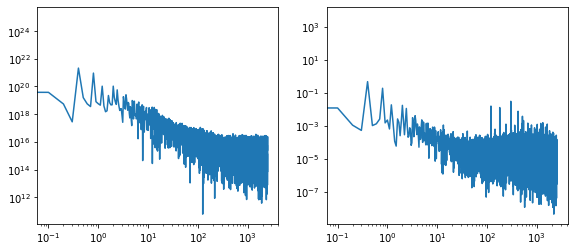

In [69]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].loglog(*bb.psd('x'))
ax[1].loglog(*bb.psd2('x'))

In [70]:
f = h5py.File(fname,'r')
pos_data = np.array(f['pos_data'])
quad_data = np.array(f['quad_data'])

In [71]:
sync = pos_data.reshape(-1,11).T[5]

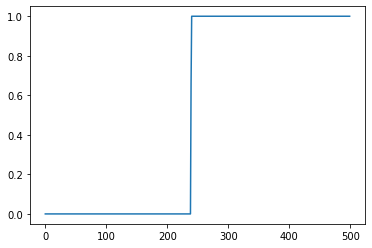

In [72]:
_,ax = plt.subplots()
ax.plot(range(500), sync[:500]/100)

In [73]:
trig_on = np.nonzero(sync)[0][0]
x = bb.xyz[0][trig_on:]

In [74]:
zfb = bb.feedback[2][239:]

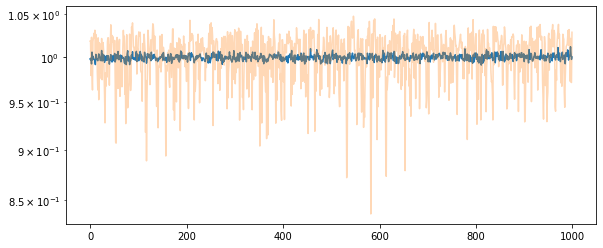

In [75]:
xx = x[:1000]/np.mean(x[:1000])
xx2 = bb.xyz2[0][:1000]/np.mean(bb.xyz2[0][:1000])
_,ax = plt.subplots(figsize=(9.5,4))
ax.semilogy(range(1000), xx)
ax.semilogy(range(1000), xx2, alpha=0.3)
# ax.semilogy(range(1000), xx-xx2, alpha=0.3)
# ax.legend()